<a href="https://colab.research.google.com/github/Jee-9/Study/blob/main/keypoint_elimination.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from scipy.interpolate import griddata
import os
import json

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
data_path = '/content/drive/MyDrive/dacon-hand/'
# new_json_path = os.path.join(data_path, "new_jsons")

In [ ]:
train_data_path = os.path.join(data_path, "train")

In [ ]:
img = Image.open(os.path.join(train_data_path, "312", "0.png"))

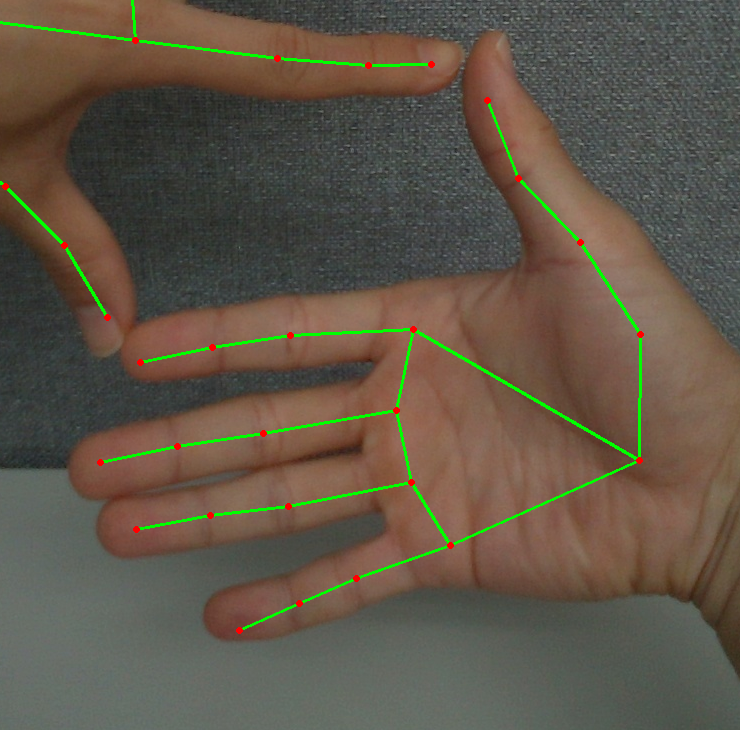

In [ ]:
img

In [ ]:
def mask_keypoint_pixel(array):
    return (array == [0, 255, 0]).all(-1) | (array == [255, 0, 0]).all(-1)


In [ ]:
img_array =np.array(img)

In [ ]:
mask = ~mask_keypoint_pixel(img_array)
x, y = np.where(mask)
grid_x, grid_y = np.mgrid[0:img_array.shape[0], 0:img_array.shape[1]]
img_val = img_array[mask]

In [ ]:
rgb_interp = [griddata([(x, y) for x, y in zip(*np.where(mask))], img_val[:, i], (grid_x, grid_y), method='nearest') for i in range(3)]
interp_array = np.stack(rgb_interp, -1)

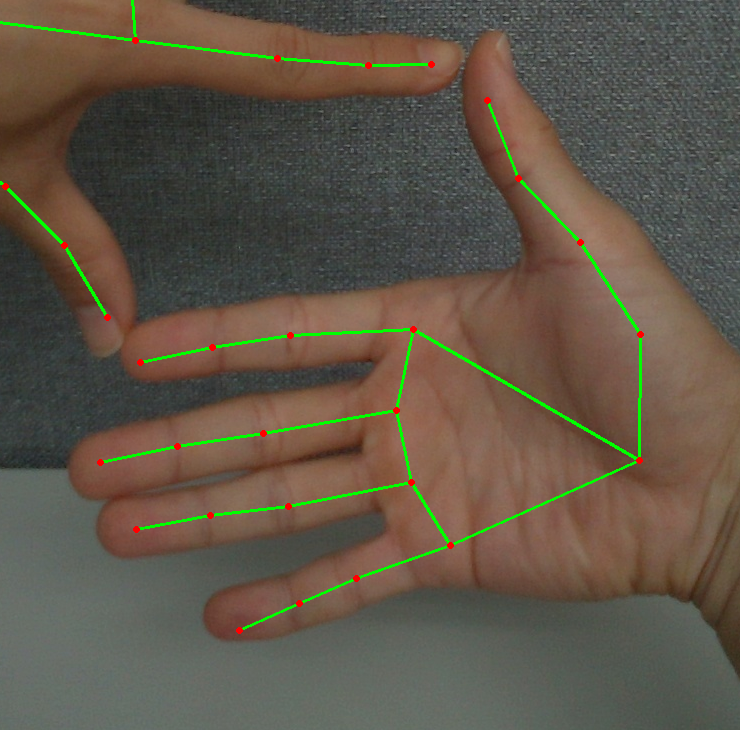

In [ ]:
Image.fromarray(img_array)

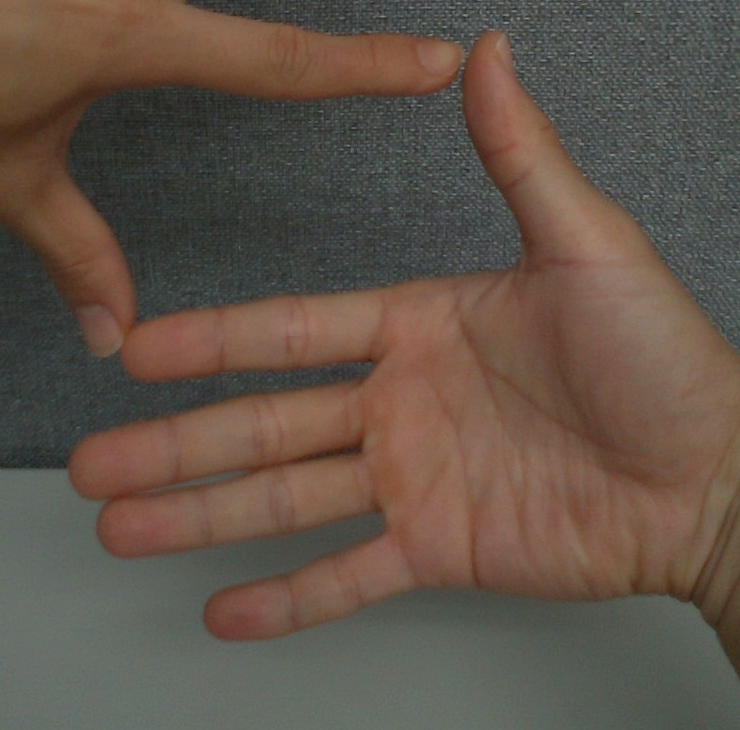

In [ ]:
Image.fromarray(interp_array)

# RE

In [8]:
# 데이터 보기
import pandas as pd
import numpy as np
from glob import glob
import glob

# 이미지데이터 로딩
from PIL import Image
import cv2
from tqdm import tqdm

# 파일경로 설정
import os
import shutil
import json

# Others
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter('ignore')
import matplotlib.pyplot as plt

In [4]:
data_path = '/content/drive/MyDrive/dacon-hand'

train_path = data_path + '/train'
test_path = data_path + '/test'

hand_ges = pd.read_csv(data_path + '/hand_gesture_pose.csv')

In [14]:
train_r_list = glob.glob('/content/drive/MyDrive/dacon-hand/train/**/*_r.png')
test_r_list = glob.glob('/content/drive/MyDrive/dacon-hand/test/**/*_r.png')

train_json_list = glob.glob('/content/drive/MyDrive/dacon-hand/train/**/*.json')
test_json_list = glob.glob('/content/drive/MyDrive/dacon-hand/test/**/*.json')

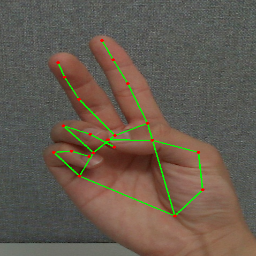

In [21]:
img = Image.open(train_r_list[1])
img

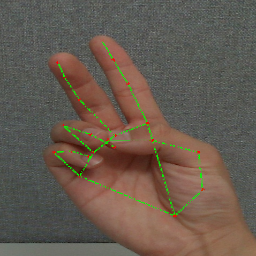

In [18]:
def mask_keypoint_pixel(array):
    return (array == [0, 255, 0]).all(-1) | (array == [255, 0, 0]).all(-1)
  
img_array = np.array(img)

mask = ~mask_keypoint_pixel(img_array)
x, y = np.where(mask)
grid_x, grid_y = np.mgrid[0:img_array.shape[0], 0:img_array.shape[1]]
img_val = img_array[mask]

rgb_interp = [griddata([(x, y) for x, y in zip(*np.where(mask))], img_val[:, i], (grid_x, grid_y), method='nearest') for i in range(3)]
interp_array = np.stack(rgb_interp, -1)

# Image.fromarray(img_array)
Image.fromarray(interp_array)

# resize 안한거

In [23]:
train_list = glob.glob('/content/drive/MyDrive/dacon-hand/train/**/*.png')

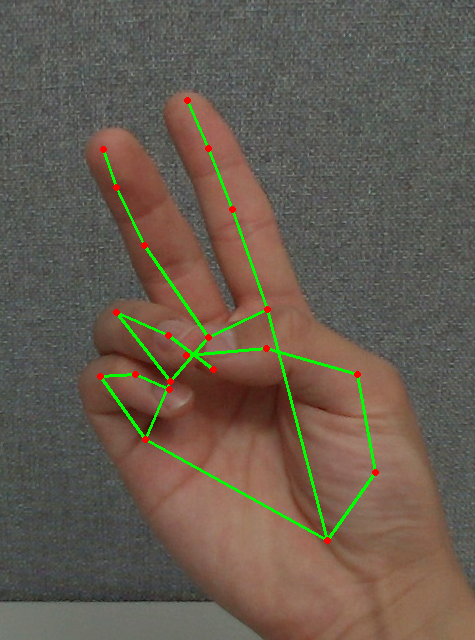

In [24]:
img = Image.open(train_list[1])
img

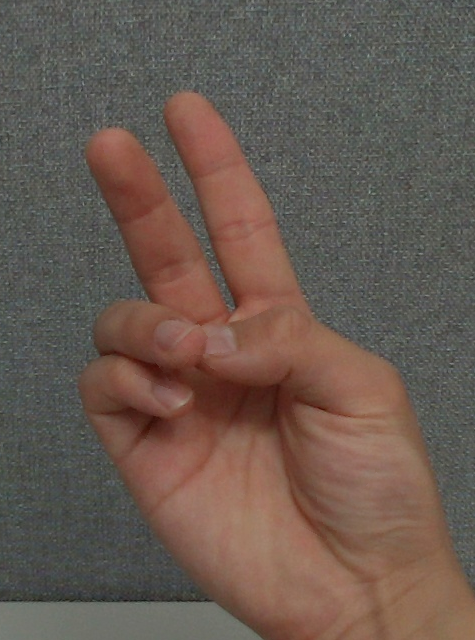

In [25]:
def mask_keypoint_pixel(array):
    return (array == [0, 255, 0]).all(-1) | (array == [255, 0, 0]).all(-1)
  
img_array = np.array(img)

mask = ~mask_keypoint_pixel(img_array)
x, y = np.where(mask)
grid_x, grid_y = np.mgrid[0:img_array.shape[0], 0:img_array.shape[1]]
img_val = img_array[mask]

rgb_interp = [griddata([(x, y) for x, y in zip(*np.where(mask))], img_val[:, i], (grid_x, grid_y), method='nearest') for i in range(3)]
interp_array = np.stack(rgb_interp, -1)

# Image.fromarray(img_array)
Image.fromarray(interp_array)